In [5]:
library(fst)
library(dplyr)
library(ggplot2)
setwd('D:/googleDrive/postdoc/')



Caricamento pacchetto: 'dplyr'


I seguenti oggetti sono mascherati da 'package:stats':

    filter, lag


I seguenti oggetti sono mascherati da 'package:base':

    intersect, setdiff, setequal, union




## SCNA table
TRACERx cohort consists of 421 patients, from which a total of 1644 tumor regions were sampled and subjected to whole-exome sequencing. Out of all these samples, there were only 401 tumors for which it was possible to reconstruct phylogenetic trees (only tumors where the purity was sufficient to determine copy number states in at least two regions were retained), for a total of 1428 regions.

This table contains the information about SCNA detected in each tumor sample corresponding to a specific region, inferred from *WES* data. 

In [6]:
cna_table = read_fst('tracerx_data/figurecode/data/20221109_TRACERx421_scna_table.fst')
head(cna_table)


,patient_id,tumour_id,sample,chr,startpos,endpos,n.het,cnTotal,nMajor,nMinor,Ploidy,ACF,nAraw,nBraw,cpn_event_vs_ploidy,MSAI,samp_used_to_phase
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<chr>
1,CRUK0005,CRUK0005,CRUK0005_SU_T1-R1,1,762273,2252860,73,3,2,1,3.131282,0.15,2.463756,1.1847605,neutral,FALSE,CRUK0005_SU_T1-R2
2,CRUK0005,CRUK0005,CRUK0005_SU_T1-R1,1,2252970,2527412,26,2,2,0,3.131282,0.15,1.645818,0.2840012,neutral,FALSE,CRUK0005_SU_T1-R2
3,CRUK0005,CRUK0005,CRUK0005_SU_T1-R1,1,2527437,2700215,12,3,2,1,3.131282,0.15,2.187291,0.9560660,neutral,FALSE,CRUK0005_SU_T1-R3
4,CRUK0005,CRUK0005,CRUK0005_SU_T1-R1,1,2700332,28531815,600,3,2,1,3.131282,0.15,1.725844,0.7082896,neutral,FALSE,CRUK0005_SU_T1-R2
5,CRUK0005,CRUK0005,CRUK0005_SU_T1-R1,1,28534782,29649999,11,3,2,1,3.131282,0.15,1.711109,0.6956101,neutral,FALSE,CRUK0005_SU_T1-R2
6,CRUK0005,CRUK0005,CRUK0005_SU_T1-R1,1,29696060,35442691,61,3,2,1,3.131282,0.15,1.534577,1.4659538,neutral,NA,none_no_allelic_imbalance_called


The columns are the following:
* `patient_id` : patient identifier
* `tumour_id` : tumor identifier
* `sample` Sample identfier. Example: CRUK0000_SU_T1-R1 stands for the sample of patient identifier CRUK0000 that was taken from region 1 (R1) of tumour 1 (T1), which was resected during primary surgery (SU).
* `chr` - `startpos` - `endpos`: coordinates of the copy number segment.
* `n.het` : number of heterozygous SNPs called on the segment.
* `cnTotal` : segment total copy number (ASCAT)
* `nMajor` : copy number of the major allele (ASCAT) (?)
* `nMinor` : copy number of the minor allele (ASCAT) (?)
* `Ploidy` : ploidy value of the sample (ASCAT) 
* `ACF` : Aberrant Cell Fraction (fraction of tumor cells in the sample) (ASCAT)
* `nAraw` : raw Allele specific copy number for the A-allele (ASCAT)
* `nBraw` : raw Allele specific copy number for the B-allele (ASCAT)
* `cpn_event_vs_ploidy` : copy number status with respect to the sample ploidy. It is a string whose value can be one of `c(`neutral`, 'gain', 'amp', 'loss', 'deep_loss')` E.g., if ploidy is 3 and cnTotal is 3, `cpn_event_vs_ploidy` will be `'neutral'`. If ploidy is 3 and cnTotal is 4, then `cpn_event_vs_ploidy` will be `'gain'`.
* `MSAI` : Mirrored Subclonal Allelic Imbalance. Logical indicating whether the corresponding allele specific copy number event corresponds to a mirrored subclonal allelic imbalance.
* `samp_used_to_phase` : ID of the sample whose allelic imbalance data was used to phase SNPs and estimate haplotype specific copy number profiles. ?: was this the result of the re-run with Refphase?

## Pathology and clinical data
TRACERx cohort consists of 421 patients, harbouring 432 genomically independent tumors. Each line in this dataframe corresponds to one of these tumours, reporting clinical data and histological features.

In [7]:
tumor_df = readRDS('tracerx_data/figurecode/data/20221109_TRACERx421_all_tumour_df.rds')
head(tumor_df)

tumour_id_muttable_cruk,cruk_id,clinical_sex,age,ethnicity,Histology_per_tumour_id_muttable,histology_3,LUAD_pred_subtype_with.IMA_per_tumour,site_per_lesion,pT_stage_per_lesion,pN_stage_per_lesion,size_pathology_per_lesion,vascular_invasion_per_lesion,pleural_invasion_per_lesion,smoking_status_merged,cigs_perday,years_smoking,pack_years,is.family.lung,pathologyTNM
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<fct>,<dbl>,<int>,<dbl>,<lgl>,<chr>
CRUK0034,CRUK0034,Female,68,White- Irish,Invasive adenocarcinoma,LUAD,acinar,Right Upper Lobe,2a,0,40,Yes,No,Ex-Smoker,20.0,35,35.000,TRUE,IB
CRUK0150,CRUK0150,Male,81,White- British,LCNEC,Other,NA,Left Upper Lobe,3,0,75,Yes,No,Ex-Smoker,44.5,49,109.025,FALSE,IIB
CRUK0159,CRUK0159,Male,60,White- British,Invasive adenocarcinoma,LUAD,acinar,Right Upper Lobe,2a,0,36,Yes,Yes,Smoker,20.0,38,38.000,FALSE,IB
CRUK0090,CRUK0090,Male,65,White- British,Squamous cell carcinoma,LUSC,NA,Right Upper Lobe,2a,1,35,Yes,Yes,Ex-Smoker,10.0,35,17.500,FALSE,IIA
CRUK0045,CRUK0045,Male,85,White- British,Invasive adenocarcinoma,LUAD,papillary,Left Lower Lobe,2a,0,48,Yes,Yes,Ex-Smoker,10.0,25,12.500,FALSE,IB
CRUK0076,CRUK0076,Male,63,White- British,Squamous cell carcinoma,LUSC,NA,Right Lower Lobe,2a,0,32,No,No,Smoker,40.0,51,102.000,FALSE,IB


The columns in the dataframe are the following:
* `tumour_id_muttable_cruk` : ID of the tumor sample
* `cruk_id` : ID of the tumor sample (same information as the previous column)
* `clinical_sex`: patient sex
* `age` : patient age
* `ethnicity` : patient ethnicity. It is one of: `c('White- Irish', 'White- British', 'Caribbean', 'Black', 'White and Asian', 'White-European', 'White- Other', 'South American','Indian', 'Middle eastern', 'White and Black')`


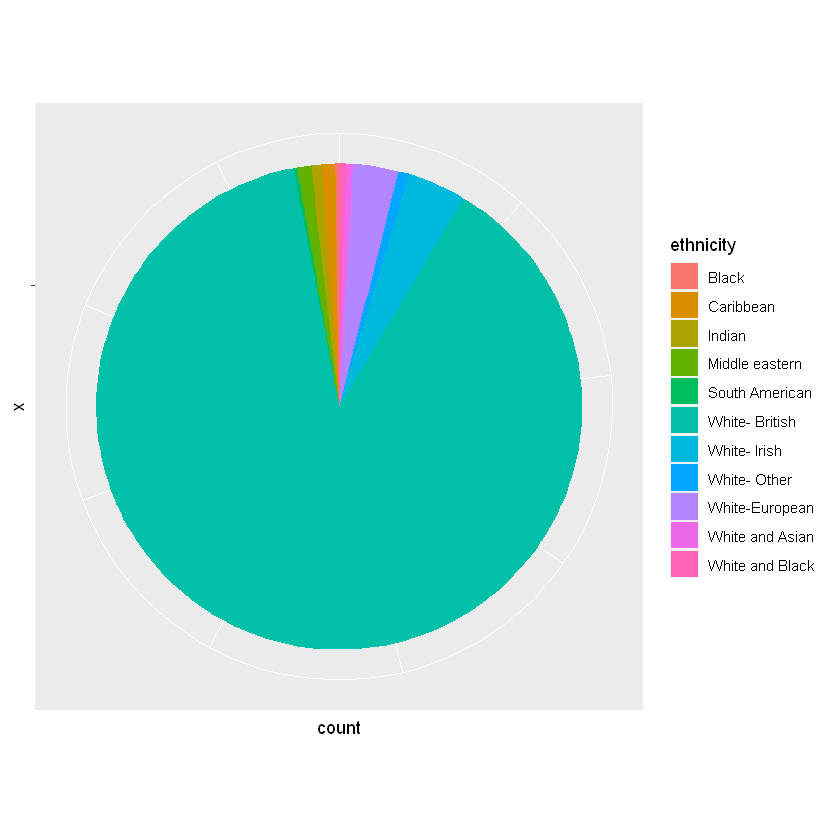

In [8]:
ggplot(data = tumor_df,
    mapping = aes(x = '
* ', fill = ethnicity)) +
    geom_bar() + coord_polar("y", start=0) + theme(axis.text = element_blank()) 

* `Histology_per_tumour_id_muttable` : full name of the tumor sample histological subtype. It's one of: `c('Invasive adenocarcinoma', 'LCNEC', 'Squamous cell carcinoma', 'Pleomorphic carcinoma', 'Adenosquamous carcinoma', 'Carcinosarcoma', 'combined LUAD and LCNEC', 'Large cell carcinoma', 'Collision LUAD and LUSC')`.  There are 248 Invasive Adenocarcinomas, 138 Squamous cell carcinomas and 46 other histological subtypes. The labels are distributed as follows:

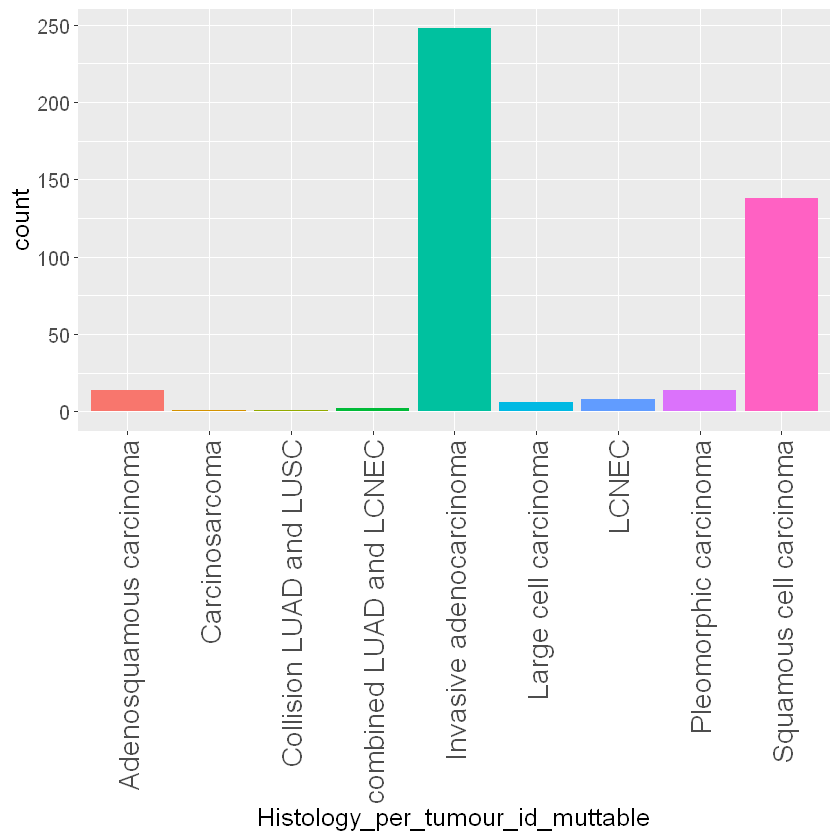

In [9]:
ggplot(data = tumor_df,
    mapping = aes(x = Histology_per_tumour_id_muttable , fill = Histology_per_tumour_id_muttable)) +
    geom_bar() + # coord_polar("y", start=0) + 
	theme(legend.position = 'none', 
		axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size = 17), 
		text = element_text(size = 15)) 

In [19]:
tumor_df %>% select(pN_stage_per_lesion, pT_stage_per_lesion) %>% unique

pN_stage_per_lesion,pT_stage_per_lesion
<int>,<chr>
0,2a
0,3
1,2a
2,2a
0,2b
0,1b
0,1a
2,2b
0,NA


* `histology_3` : for samples that are either `'Invasive adenocarcinoma'` or `'Squamous cell carcinoma'` this column is equal to LUAD and LUSC respectively. For all other histologies, this column contains 'Other'.
* `LUAD_pred_subtype_with.IMA_per_tumour`. For LUAD samples, this column contains the tissue architecture growth pattern. Such patterns are inferred from diagnostic H&E slides, and they can be divided in two categories: low-grade (lepidic, mid grade, papillary and acinar) and high-grade (cribriform, micropapillary and solid).
* `site_per_lesion` : location of the tumor. It is one of `c('Right Upper Lobe', 'Left Upper Lobe', 'Left Lower Lobe', 'Right Lower Lobe', 'Right Middle Lobe', 'Left Upper lobe')`
* `pT_stage_per_lesion` : (?) I don't know what this stands for.
* `pN_stage_per_lesion` : (?) I don't know what this stands for. The values are 0, 1 and 2
* `size_pathology_per_lesion` : pathological tumor size. (?) how is it calculated? It ranges between 7 and 140
* `vascular_invasion_per_lesion` : logical indicating the presence of lymphovascular invasion.
* `pleural_invasion_per_lesion` : logical indicating the presence of visceral pleural invasion.
* `smoking_status_merged` : smoking status of the patient. Can be `c('Ex-Smoker' 'Smoker' and 'Never Smoked')`
* `cigs_perday` : number of cigarettes smoked per day. There are non integer values because some patients smoke cigars or pipes, whose amoiunt was converted to the equivalent in cigarettes counts. One cigar is assumed to be equivalent to approximately 1.5 cigarettes, and for pipes, one bowl of tobacco is equivalent to 2.5 cigarettes, following the table presented [here](http://www.smoking2.nes.scot.nhs.uk/module4/working-out-cigarette-equivalents.html) for conversions.
* `years_smoking` : duration fof smoking in terms of years.
* `pack_years` : number of cigarettes packs smoked per year.
* `is.family.lung` : (?) logical indicating whether there is a history of lung cancer in the family.
* `pathologyTNM` : pathological Tumor, Node and Metastasis (TNM) stage (? check I defined it right)


## Per tumor CNAs

This table contains copy number information grouped at the tumor level. For each genomic segment and each tumor, it contains information about whether that segment is involved in a Mirrored Subclonal Allelic Imbalance, and for each tumor it gives the information about the corresponding tumor cluster.

(?) In the table there are 403 tumours, but in the main paper it is reported that it was possible to reconstruct a phylogeny for 401 tumours.

In [26]:
cna_single_df = read_fst('tracerx_data/figurecode/data/20220823_TRACERx421_scna_table_per_tumour.fst')
head(cna_single_df)

,tumour_id,patient_id,seg_name,chr,startpos,endpos,seg_size,pt_seg_parallel_MSAI_gain_or_amp,pt_seg_parallel_MSAI_loss_or_LOH,Tumour.cluster
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,CRUK0034,CRUK0034,1:114967161:121310061,1,114967161,121310061,6342900,FALSE,FALSE,NA
2,CRUK0034,CRUK0034,1:144854565:144916748,1,144854565,144916748,62183,FALSE,FALSE,NA
3,CRUK0034,CRUK0034,1:144917546:145096660,1,144917546,145096660,179114,FALSE,FALSE,NA
4,CRUK0034,CRUK0034,1:145414756:156563855,1,145414756,156563855,11149099,FALSE,FALSE,NA
5,CRUK0034,CRUK0034,1:1469341:2488112,1,1469341,2488112,1018771,FALSE,FALSE,NA
6,CRUK0034,CRUK0034,1:156564726:161475875,1,156564726,161475875,4911149,FALSE,FALSE,NA


The columns are the following:
* `tumour_id` : ID of the tumor from the TRACERx cohort
* `patient_id` : ID of the patient from the TRACERx cohort
* `seg_name` : identifier of the segment: chromosome:start:end
* `chr` : chromsome of the segment
* `startpos` : start position of the segment
* `endpos` : end position of the segment
* `seg_size` : size of the segment
* `pt_seg_parallel_MSAI_gain_or_amp` : whether the segment is affected by a Mirrored subclonal allelic imbalance in the form of a gain or an amplififcation
* `pt_seg_parallel_MSAI_loss_or_LOH` : whether the segment is affected by a Mirrored subclonal allelic imbalance in the form of a loss or an loss of heterozygosity
* `Tumour.cluster` : identifier of the cluster to which this tumour is assigned.
 

In [38]:
tmp = cna_single_df %>% select(tumour_id, patient_id, Tumour.cluster) %>% unique

sum(table(tmp$patient_id) == 1)

[1] 386

## Patients data

TRACERx cohort consists of 421 patients. Each line in this dataframe corresponds to one of these patients, reporting clinical data.

In [43]:
patients_df = readRDS('tracerx_data/figurecode/data/20221109_TRACERx421_all_patient_df.rds')
head(patients_df)

,cruk_id,tumour_id_muttable_cruk,tumour_id_per_patient,age,sex,ethnicity,cigs_perday,years_smoking,packyears,smoking_status_merged,⋯,os_time,cens_dfs,dfs_time,cens_dfs_any_event,dfs_time_any_event,cens_lung_event,lung_event_time,Relapse_cat,Relapse_cat_new,tx100
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<fct>,<lgl>
1,CRUK0034,CRUK0034,CRUK0034,68,Female,White- Irish,20.0,35,35.000,Ex-Smoker,⋯,1849,0,1849,0,1849,0,1849,NA,No rec,TRUE
2,CRUK0150,CRUK0150,CRUK0150,81,Male,White- British,44.5,49,109.025,Ex-Smoker,⋯,1362,1,1362,1,1362,0,1362,NA,No rec,FALSE
3,CRUK0159,CRUK0159,CRUK0159,60,Male,White- British,20.0,38,38.000,Smoker,⋯,2224,1,2224,1,1935,0,2224,Second primary lung,No rec,FALSE
4,CRUK0090,CRUK0090,CRUK0090,65,Male,White- British,10.0,35,17.500,Ex-Smoker,⋯,2365,1,1143,1,1143,1,1143,Intrathoracic,Intrathoracic,TRUE
5,CRUK0045,CRUK0045,CRUK0045,85,Male,White- British,10.0,25,12.500,Ex-Smoker,⋯,986,1,917,1,917,1,917,Intrathoracic,Intrathoracic,TRUE
6,CRUK0076,CRUK0076,CRUK0076,63,Male,White- British,40.0,51,102.000,Smoker,⋯,1934,0,1934,0,1934,0,1934,NA,No rec,TRUE


* `cruk_id` : CRUK tumour ID
* `tumour_id_muttable_cruk`: CRUK tumour ID
* `tumour_id_per_patient` : CRUK tumour ID
* `age` : age of the patient
* `sex` : sex of the patient
* `ethnicity` : ethnicity of the patient
* `cigs_perday` : number of cigarettes smoked per day. There are non integer values because some patients smoke cigars or pipes, whose amoiunt was converted to the equivalent in cigarettes counts. One cigar is assumed to be equivalent to approximately 1.5 cigarettes, and for pipes, one bowl of tobacco is equivalent to 2.5 cigarettes, following the table presented [here](http://www.smoking2.nes.scot.nhs.uk/module4/working-out-cigarette-equivalents.html) for conversions.
* `years_smoking` : number of years the patient has been smoking.
* `packyears` :  number of cigarettes packs smoked per year.
* `smoking_status_merged` : smoking status of the patient. Can be `c('Ex-Smoker' 'Smoker' and 'Never Smoked')`
* `is.family.lung` : logical indicating whether there is a history of lung cancer in the family.
* `ECOG_PS` : (?)

In [59]:
patients_df %>% select('ECOG_PS') %>% head
unique(patients_df$ECOG_PS)

,ECOG_PS
,<dbl>
1,0
2,0
3,0
4,1
5,1
6,1


[1] 0 1

* `pathologyTNM`
* `pT_stage_per_patient`
* `pN_stage_per_patient`
* `LVI_per_patient`

In [56]:
patients_df %>% select('LVI_per_patient') %>% head
print(unique(patients_df$LVI_per_patient))

,LVI_per_patient
,<chr>
1,Yes
2,Yes
3,Yes
4,Yes
5,Yes
6,No


[1] "Yes" "No" 


* `PL_per_patient`


In [57]:
patients_df %>% select('PL_per_patient') %>% head
print(unique(patients_df$PL_per_patient))

,PL_per_patient
,<chr>
1,No
2,No
3,Yes
4,Yes
5,Yes
6,No


[1] "No"  "Yes"


* `margin_status_per_patient`


In [58]:
patients_df %>% select('margin_status_per_patient') %>% head
print(unique(patients_df$margin_status_per_patient))

,margin_status_per_patient
,<chr>
1,R0
2,R0
3,R0
4,R0
5,R0
6,R0


[1] "R0" "R1"


* `size_pathology_per_patient` : pathology size
* `Surgery_type` : surgery performed on patient. Can be one of 'Lobectomy''Segmentectomy or wedge resection''Bilobectomy''Pneumonectomy''Lobectomy and wedge resection''Lingulectomy'.
* `histology_lesion1` : histology of the patient samples.
* `histology_lesion1_merged` : how was the information merged across the multiple samples? These are the patients where the two columns are not identical.


In [66]:
unique(patients_df$histology_lesion1)

patients_df %>%
	dplyr::filter(histology_lesion1 != histology_lesion1_merged) %>% 
	select(histology_lesion1, histology_lesion1_merged)

[1] "Invasive adenocarcinoma" "LCNEC"                  
[3] "Squamous cell carcinoma" "Pleomorphic carcinoma"  
[5] "Adenosquamous carcinoma" "Carcinosarcoma"         
[7] "combined LUAD and LCNEC" "Large cell carcinoma"   
[9] "Collision LUAD and LUSC"

histology_lesion1,histology_lesion1_merged
<chr>,<chr>
Carcinosarcoma,Other
combined LUAD and LCNEC,LCNEC
Collision LUAD and LUSC,Other
combined LUAD and LCNEC,LCNEC


* `lesion1_sampled` : logical indicating whether lesion 1 was sampled.
* `histology_lesion2` : histology for lesion 2 (when sampled)
* `lesion2_sampled` : logical indicating whether lesion 2 was sampled.
* `histology_multi_full` : (?) 


In [71]:
table(patients_df$histology_multi_full)


         LUAD     LUAD&LUSC    LUAD&Other        LUADx2        LUADx3 
          223             8             3             9             1 
         LUSC    LUSC&Other         Other Other&Unknown 
          131             1            44             1 

* `histology_multi_full_genomically.confirmed`


In [72]:
table(patients_df$histology_multi_full_genomically.confirmed)


      LUAD  LUAD&LUSC LUAD&Other     LUADx2     LUADx3       LUSC      Other 
       231          4          1          5          1        134         45 

* `LUAD_pred_subtype` :  For LUAD samples, this column contains the tissue architecture growth pattern. Such patterns are inferred from diagnostic H&E slides, and they can be divided in two categories: low-grade (lepidic, mid grade, papillary and acinar) and high-grade (cribriform, micropapillary and solid).
* `adjuvant_treatment_YN` : can either be 'No adjuvant' or 'Adjuvant' based on whether the patient received adjuvant treatment
* `adjuvant_treatment_given` : which adjuvant treatment was given to the patient. It can be one of `'Platinum chemo''Radiotherapy'` and `'Platinum chemo/radiotherapy'`. For patients who did not receive adjuvant treatment, this columns is NA.
* `num_cycle_na.added` : number of cycles of adjuvant treatment given to the patient. For those who did not receive AT, this column is equal to 0. 
* `CHMPlatDgName_cleaned` : name of the chemotherapy platinum agent used in each AT cycle. The drug names for each cycle are separated by ';', eg, Cisplatin;Carboplatin. (?) check whether this is correct
* `CHMOthDgName_cleaned` : name of the second chemotherapy drug given in combination with the platinum agent. Drug names in each cycle are separated by ';'.


In [83]:
patients_df %>% select(num_cycle_na.added, adjuvant_treatment_YN, adjuvant_treatment_given, CHMPlatDgName_cleaned, CHMOthDgName_cleaned) %>% unique

,num_cycle_na.added,adjuvant_treatment_YN,adjuvant_treatment_given,CHMPlatDgName_cleaned,CHMOthDgName_cleaned
,<chr>,<chr>,<chr>,<chr>,<chr>
1,0,No adjuvant,NA,NA,NA
3,4,Adjuvant,Platinum chemo,Cisplatin;Cisplatin;Cisplatin;Cisplatin,Vinorelbine;Vinorelbine;Vinorelbine;Vinorelbine
4,3,Adjuvant,Platinum chemo,Cisplatin;Cisplatin;Cisplatin,Vinorelbine;Vinorelbine;Vinorelbine
7,1,Adjuvant,Platinum chemo,Cisplatin,Vinorelbine
11,2,Adjuvant,Platinum chemo,Cisplatin;Carboplatin,Vinorelbine;Vinorelbine
27,4,Adjuvant,Platinum chemo,Carboplatin;Carboplatin;Carboplatin;Carboplatin,Vinorelbine;Vinorelbine;Vinorelbine;Vinorelbine
30,0,Adjuvant,Radiotherapy,NA,NA
57,5,Adjuvant,Platinum chemo,Cisplatin;Carboplatin;Carboplatin;Carboplatin;Carboplatin,Vinorelbine;Pemetrexed;Pemetrexed;Pemetrexed;Pemetrexed
58,4,Adjuvant,Platinum chemo/radiotherapy,Cisplatin;Cisplatin;Carboplatin;Carboplatin,Vinorelbine;Vinorelbine;Vinorelbine;Vinorelbine


* `AdjRadStartTime_manual` : time when adjuvant radiotherapy started (when applicable)
* `AdjRadEndTime_manual` : end timepoint of the adjuvant radiotherapy (when applicable)

In [87]:
unique(patients_df$AdjRadStartTime_manual)
patients_df %>% select(num_cycle_na.added, adjuvant_treatment_YN, AdjRadStartTime_manual, AdjRadEndTime_manual) %>% unique

[1]  NA  61 107 154  34  88 135 124 130 237  42 125  69 147  64

,num_cycle_na.added,adjuvant_treatment_YN,AdjRadStartTime_manual,AdjRadEndTime_manual
,<chr>,<chr>,<dbl>,<dbl>
1,0,No adjuvant,NA,NA
3,4,Adjuvant,NA,NA
4,3,Adjuvant,NA,NA
7,1,Adjuvant,NA,NA
11,2,Adjuvant,NA,NA
30,0,Adjuvant,61,86
33,0,Adjuvant,107,128
57,5,Adjuvant,NA,NA
58,4,Adjuvant,154,195


In [97]:
table(patients_df$first_dfs_any_event_rec.or.new.primary)


new_primary  recurrence 
         41         142 

In [104]:
patients_df %>% 
	select(Recurrence_time_use, newPrim_time_use, first_dfs_any_event_rec.or.new.primary, first_event_during_followup) %>% 
	unique

,Recurrence_time_use,newPrim_time_use,first_dfs_any_event_rec.or.new.primary,first_event_during_followup
,<dbl>,<int>,<chr>,<chr>
1,NA,NA,NA,NA
2,NA,NA,NA,Death
3,NA,1935,new_primary,new_primary
4,1143,NA,recurrence,recurrence
5,917,NA,recurrence,recurrence
7,456,NA,recurrence,recurrence
9,NA,492,new_primary,new_primary
10,NA,1419,new_primary,new_primary
13,108,NA,recurrence,recurrence



* `Recurrence_time_use` : time when recurrence was confirmed
* `newPrim_time_use` : time when a new primary tumour was detected.
* `first_dfs_any_event_rec.or.new.primary` : whether this patient underwaent a recurrence event or developed a new primary tumour. There are 41 new primaries, and 5 of them developed a recurrence.
* `first_event_during_followup` : one of 'Death', 'new_primary', 'recurrence' and 'recurrence (death)'. 


In [112]:
patients_df %>% 
	filter(!is.na(newPrim_time_use) & !is.na(Recurrence_time_use)) %>%
	select(tumour_id_per_patient, Recurrence_time_use, newPrim_time_use, 
		   first_dfs_any_event_rec.or.new.primary, first_event_during_followup, 
		   Relapse_cat)

tumour_id_per_patient,Recurrence_time_use,newPrim_time_use,first_dfs_any_event_rec.or.new.primary,first_event_during_followup,Relapse_cat
<chr>,<dbl>,<int>,<chr>,<chr>,<chr>
CRUK0046,840,840,new_primary,new_primary,Second primary lung
CRUK0373,1031,881,new_primary,new_primary,Other second primary
CRUK0428,633,302,new_primary,new_primary,Second primary lung
CRUK0512,828,447,new_primary,new_primary,Second primary lung
CRUK0511,1055,866,new_primary,new_primary,Other second primary


* `cens_os`
* `os_time`
* `cens_dfs`
* `dfs_time` : period from the date of registration to the time of radiological confirmation of the recurrence of the primary tumor
registered for the TRACERx or the time of death by any cause.
* `cens_dfs_any_event`
* `dfs_time_any_event`
* `cens_lung_event`
* `lung_event_time`
* `Relapse_cat`
* `Relapse_cat_new`
* `tx100`


In [118]:
patients_df %>% select(dfs_time_any_event, dfs_time) %>% filter(dfs_time_any_event != dfs_time)

dfs_time_any_event,dfs_time
<int>,<int>
1935,2224
492,510
1419,1800
1093,1337
532,1313
671,1846
1043,1062
1396,1934
1906,2197
